In [1]:
# python version 3.6.9 #
import pandas as pd # 1.1.5
import numpy as np # 1.19.5
import matplotlib.pyplot as plt
import matplotlib # 3.3.4
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rc('text', usetex=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('source_data/included/figure.style')
cm = plt.cm.get_cmap('tab20c')


In [2]:
full_table = pd.read_csv('source_data/included/source_1B_ED1_2A.csv',sep=',')
metG_lag = full_table.loc[(full_table['strain']=='metG') & (full_table['phase']=='lag')]
MG_lag = full_table.loc[(full_table['strain']=='MG1655') & (full_table['phase']=='lag')]
metG_stat = full_table.loc[(full_table['strain']=='metG') & (full_table['phase']=='undiluted')]
MG_stat = full_table.loc[(full_table['strain']=='MG1655') & (full_table['phase']=='undiluted')]

19
14


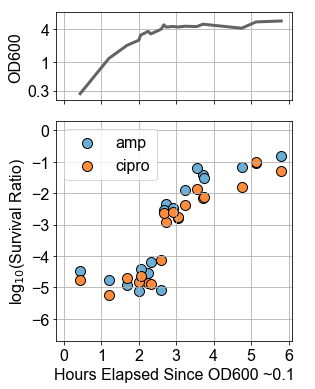

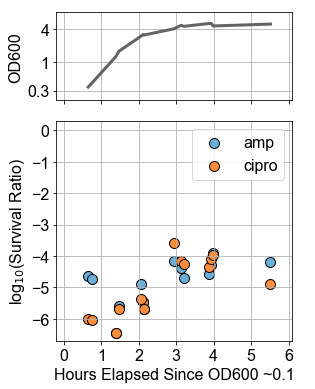

In [3]:
tables = [metG_lag,MG_lag]
file_names = ['figures/fig1b_left.pdf','figures/fig1b_right.pdf']
for t,file_name in zip(tables,file_names):
    fig,ax = plt.subplots(2, 1, figsize=(5,6),gridspec_kw={'height_ratios': [2,5]},sharey='row',sharex='col')
    ax[0].set_ylim(-0.7,0.9)
    ax[0].set_xlim(-0.2,6.1)
    ax[0].set_xticks([0,1,2,3,4,5,6])
    ax[0].set_ylabel('OD600')
    ax[0].set_yticks([np.log10(0.3),np.log10(1),np.log10(4)])
    ax[0].set_yticklabels([0.3,1,4])
    ax[0].grid(True)

    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel('Hours Elapsed Since OD600 ~0.1')

    table = t.loc[t['time_from_OD0.1']>=0]
    table = table.loc[table['time_from_OD0.1']<20]
    table = table.sort_values('time_from_OD0.1')
    ax[0].plot(table['time_from_OD0.1'],np.log10(table['OD600']),color=cm(16),label='OD600')

    table = t.loc[t['time_from_OD0.1']<20]
    ax[1].scatter(table['time_from_OD0.1'],np.log10(table['amp']),color=cm(1),s=100,label='amp',edgecolors='black')
    ax[1].scatter(table['time_from_OD0.1'],np.log10(table['cipro']),color=cm(5),s=100,label='cipro',edgecolors='black')

    ax[0].set_axisbelow(True)

    ax[1].set_ylim(-6.7,0.3)
    ax[1].set_yticks(np.arange(-6,1,1))
    ax[1].set_ylabel('log$_{10}$(Survival Ratio)')
    ax[1].grid(True)
    ax[1].legend(fontsize=16)
    print(len(table))
    plt.tight_layout()
    plt.savefig(file_name)


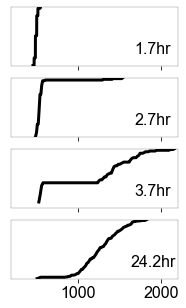

In [4]:
matplotlib.rcParams['axes.linewidth'] = 0.2 

appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)

fig,ax = plt.subplots(4,1, sharex='col',figsize=(3,5))
i=0
for t in ['1.7hr_metG_20210421','2.7hr_metG_20210421','3.7hr_metG_20210421','24.2hr_metG_20210421']:
    data = appearance_times.loc[t,'appearance']
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    ax[i].plot(bins_count[1:], cdf, color="k",linewidth=3)
    ax[i].text(1900,0.2,t.split('_metG_')[0],ha='center',size=16)
    ax[i].set_ylim(0,1)
    ax[i].set_yticks([])
    ax[i].set_xlim([200,2200])
    i += 1
    
matplotlib.rcParams['axes.linewidth'] = 1

plt.savefig('figures/fig1c_left.pdf')



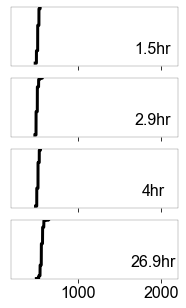

In [5]:
matplotlib.rcParams['axes.linewidth'] = 0.2 

appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)

fig,ax = plt.subplots(4,1, sharex='col',figsize=(3,5))
i=0
for t in ['1.5hr_wt_20210615','2.9hr_wt_20210721','4hr_wt_20210721','26.9hr_wt_20210618']:
    data = appearance_times.loc[t,'appearance']
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    ax[i].plot(bins_count[1:], cdf, color="k",linewidth=3)
    ax[i].text(1900,0.2,t.split('_wt_')[0],ha='center',size=16)
    ax[i].set_ylim(0,1)
    ax[i].set_yticks([])
    ax[i].set_xlim([200,2200])
    i += 1
    
matplotlib.rcParams['axes.linewidth'] = 1
plt.savefig('figures/fig1c_right.pdf')
